In [1]:
from nnlearn.Network import *
from numba import njit
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

np.random.seed(100)

In [2]:
#creating network with 2 hidden layers w/ relu activation

test_net_relu_layers = [
    input_layer(size = 2),
    
    connected_layer(num_neurons = 10, prev_neurons = 2),
    relu_activation_layer(10),
    
    connected_layer(num_neurons = 10, prev_neurons = 10),
    relu_activation_layer(10),
    
    connected_layer(num_neurons = 2, prev_neurons = 10)
    
]

test_net_relu = network(test_net_relu_layers)

# test_net_relu.print_structure()

In [3]:
#creating network with 2 hidden layers w/ relu activation

test_net_leaky_relu_layers = [
    input_layer(size = 2),
    
    connected_layer(num_neurons = 10, prev_neurons = 2),
    leaky_relu_activation_layer(10),
    
    connected_layer(num_neurons = 10, prev_neurons = 10),
    leaky_relu_activation_layer(10),
    
    connected_layer(num_neurons = 2, prev_neurons = 10)
    
]

test_net_leaky_relu = network(test_net_leaky_relu_layers)

# test_net_leaky_relu.print_structure()

In [4]:
#creating data points to learn

x = np.random.uniform(-2,2,(10000,2))

y = np.array([[s[0]*s[1] , np.cos(s[0] + s[1])] for s in x])

y += np.random.normal(loc = 0, scale = .2, size = y.shape)



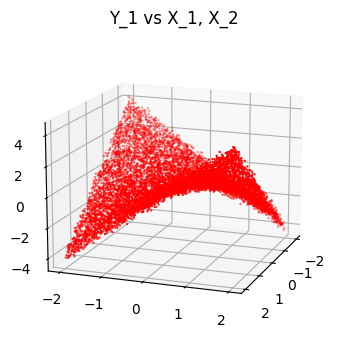

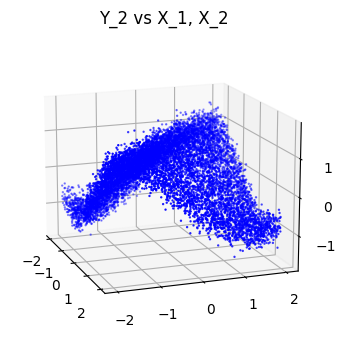

In [5]:
plt.figure(figsize=(4,4))
ax = plt.axes(projection = "3d")
plt.title("Y_1 vs X_1, X_2")

ax.scatter(x[:,0], x[:,1], y[:,0], s = .5, color = 'r', label = 'y_1')

ax.view_init(15, 20)
plt.show()



plt.figure(figsize=(4,4))
ax = plt.axes(projection = "3d")
plt.title("Y_2 vs X_1, X_2")

ax.scatter(x[:,0], x[:,1], y[:,1], s = .5, color = 'b', label = "y_2")

ax.view_init(15, -20)
plt.show()


In [6]:
start = time()

test_net_relu.minibatch_fit(x, y, batch_size = 5, epochs = 5000, verbose = True, learn_coef = .05)


end = time()
print("\n\n ReLu train time:", round(end-start, 2), "sec")




start = time()

test_net_leaky_relu.minibatch_fit(x, y, batch_size = 5, epochs = 5000, verbose = True, learn_coef = .05)


end = time()
print("\n\n Leaky ReLu train time:", round(end-start, 2), "sec")


--------------------
epoch: 1 
 loss: 2.1296
--------------------
epoch: 1001 
 loss: 0.0752
--------------------
epoch: 2001 
 loss: 0.0669
--------------------
epoch: 3001 
 loss: 0.0509
--------------------
epoch: 4001 
 loss: 0.0603
--------------------
epoch: 5000 
 loss: 0.051


 ReLu train time: 1.92 sec


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/nnlearn/Helper_Functions.py:54: NumbaExperimentalFeatureWarning: Use of isinstance() detected. This is an experimental feature.
  return np.where(x > 0, x, 0.01*x)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/nnlearn/Helper_Functions.py:63: NumbaExperimentalFeatureWarning: Use of isinstance() detected. This is an experimental feature.
  return np.where(output > 0, 1, 0.01)


--------------------
epoch: 1 
 loss: 3.0693
--------------------
epoch: 1001 
 loss: 0.0626
--------------------
epoch: 2001 
 loss: 0.067
--------------------
epoch: 3001 
 loss: 0.0549
--------------------
epoch: 4001 
 loss: 0.0582
--------------------
epoch: 5000 
 loss: 0.0519


 Leaky ReLu train time: 3.46 sec


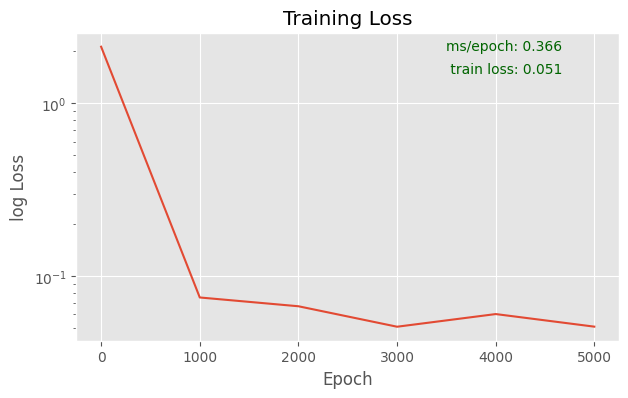

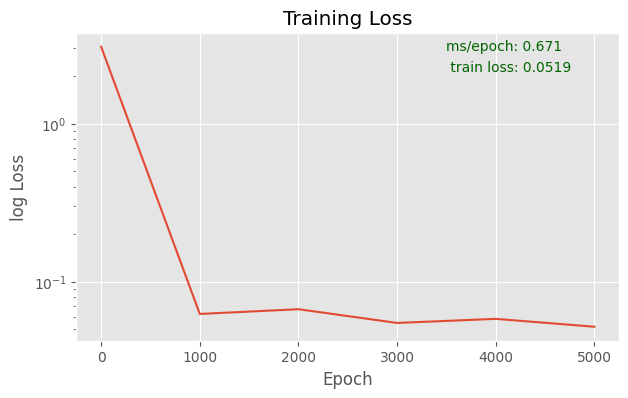

In [7]:
test_net_relu.graph_loss_history('log')
test_net_leaky_relu.graph_loss_history('log')

In [8]:
x_test = np.random.uniform(-2,2,(10000,2))

y_test = np.array([[s[0]*s[1], s[0] + s[1]] for s in x])

y_test_fitted_relu = np.array([test_net_relu.predict(x)  for x in x_test  ])

y_test_fitted_leaky_relu = np.array([test_net_leaky_relu.predict(x)  for x in x_test  ])

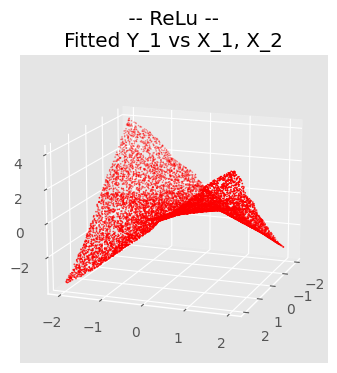

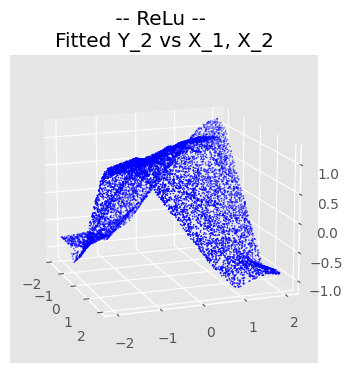

In [9]:
plt.figure(figsize=(4,4))
ax = plt.axes(projection = "3d")
plt.title(" -- ReLu -- \nFitted Y_1 vs X_1, X_2")

ax.scatter(x_test[:,0], x_test[:,1], y_test_fitted_relu[:,0], s = .5, color = 'r', label = 'y_1')

ax.view_init(15, 20)
plt.show()

plt.figure(figsize=(4,4))
ax = plt.axes(projection = "3d")
plt.title(" -- ReLu --  \nFitted Y_2 vs X_1, X_2")

ax.scatter(x_test[:,0], x_test[:,1], y_test_fitted_relu[:,1], s = .5, color = 'b', label = "y_2")

ax.view_init(15, -20)
plt.show()

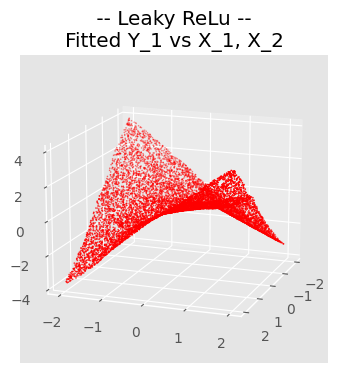

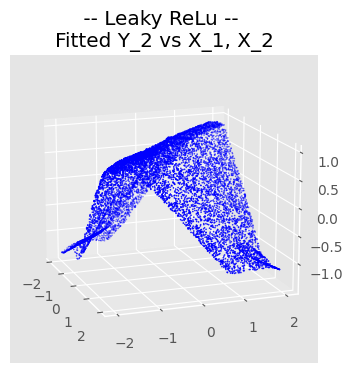

In [10]:
plt.figure(figsize = (4,4))


ax = plt.axes(projection = "3d")
plt.title(" -- Leaky ReLu -- \nFitted Y_1 vs X_1, X_2")

ax.scatter(x_test[:,0], x_test[:,1], y_test_fitted_leaky_relu[:,0], s = .5, color = 'r', label = 'y_1')

ax.view_init(15, 20)
plt.show()



plt.figure(figsize=(4,4))
ax = plt.axes(projection = "3d")
plt.title(" -- Leaky ReLu --  \nFitted Y_2 vs X_1, X_2")

ax.scatter(x_test[:,0], x_test[:,1], y_test_fitted_leaky_relu[:,1], s = .5, color = 'b', label = "y_2")

ax.view_init(15, -20)
plt.show()